<a href="https://colab.research.google.com/github/ciepielajan/SDA_SMOG_Wawelski/blob/main/Jan/folium_HeatMap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [7]:
!gdown --id "186S03hFJ67K4eV1BWb2_6lZxAYG7dBM4"

Downloading...
From: https://drive.google.com/uc?id=186S03hFJ67K4eV1BWb2_6lZxAYG7dBM4
To: /content/archive.zip
2.39MB [00:00, 76.4MB/s]


In [8]:
!unzip -q "archive.zip" -d data/

In [9]:
all_file_names = glob.glob("data/*2017.csv")
all_file_names = sorted(all_file_names)
for counter, file in enumerate(all_file_names):
    print(counter, file)

0 data/april-2017.csv
1 data/august-2017.csv
2 data/december-2017.csv
3 data/february-2017.csv
4 data/january-2017.csv
5 data/july-2017.csv
6 data/june-2017.csv
7 data/march-2017.csv
8 data/may-2017.csv
9 data/november-2017.csv
10 data/october-2017.csv
11 data/september-2017.csv


In [10]:
jan = pd.read_csv(all_file_names[4])
feb = pd.read_csv(all_file_names[3])
mar = pd.read_csv(all_file_names[7])
apr = pd.read_csv(all_file_names[0])
may = pd.read_csv(all_file_names[8])
jun = pd.read_csv(all_file_names[6])
jul = pd.read_csv(all_file_names[5])
aug = pd.read_csv(all_file_names[1])
sep = pd.read_csv(all_file_names[11])
octo = pd.read_csv(all_file_names[10])
nov = pd.read_csv(all_file_names[9])
dec = pd.read_csv(all_file_names[2])

In [11]:
dec.head(1)

,UTC time,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,140_pm1,140_pm25,140_pm10,142_temperature,142_humidity,142_pressure,142_pm1,142_pm25,142_pm10,147_temperature,147_humidity,147_pressure,147_pm1,147_pm25,147_pm10,169_temperature,169_humidity,169_pressure,169_pm1,169_pm25,169_pm10,170_temperature,170_humidity,170_pressure,170_pm1,170_pm25,170_pm10,171_temperature,171_humidity,171_pressure,...,228_pressure,228_pm1,228_pm25,228_pm10,263_temperature,263_humidity,263_pressure,263_pm1,263_pm25,263_pm10,622_temperature,622_humidity,622_pressure,622_pm1,622_pm25,622_pm10,713_temperature,713_humidity,713_pressure,713_pm1,713_pm25,713_pm10,808_temperature,808_humidity,808_pressure,808_pm1,808_pm25,808_pm10,857_temperature,857_humidity,857_pressure,857_pm1,857_pm25,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
0,2017-12-01T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0,96,100542,39,38,68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-11.0,70.0,100479.0,25.0,23.0,40.0,0.0,72.0,100527.0,29.0,28.0,48.0,0,96,100531,...,100616.0,27.0,25.0,41.0,0.0,97.0,100602.0,25.0,21.0,35.0,0,97,100810,34,33,62,5.0,97.0,100036.0,12.0,10.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,0,88,100554,32,33,74,0,94,100607,34,36,66


In [12]:
year = pd.concat([jan, feb, mar, apr, may, jun, jul, aug, sep, octo, nov, dec])

In [13]:
year.shape

(8593, 337)

In [14]:
year.head(2)

,UTC time,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,140_pm1,140_pm25,140_pm10,142_temperature,142_humidity,142_pressure,142_pm1,142_pm25,142_pm10,147_temperature,147_humidity,147_pressure,147_pm1,147_pm25,147_pm10,169_temperature,169_humidity,169_pressure,169_pm1,169_pm25,169_pm10,170_temperature,170_humidity,170_pressure,170_pm1,170_pm25,170_pm10,171_temperature,171_humidity,171_pressure,...,228_pressure,228_pm1,228_pm25,228_pm10,263_temperature,263_humidity,263_pressure,263_pm1,263_pm25,263_pm10,622_temperature,622_humidity,622_pressure,622_pm1,622_pm25,622_pm10,713_temperature,713_humidity,713_pressure,713_pm1,713_pm25,713_pm10,808_temperature,808_humidity,808_pressure,808_pm1,808_pm25,808_pm10,857_temperature,857_humidity,857_pressure,857_pm1,857_pm25,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
0,2017-01-01T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.0,68.0,102279.0,115.0,127.0,196.0,-3.0,57.0,102505.0,196.0,222.0,346.0,0.0,49.0,102689.0,124.0,145.0,229.0,2.0,25.0,102379.0,148.0,176.0,277.0,1.0,27.0,102437.0,...,102253.0,184.0,218.0,322.0,0.0,54.0,101672.0,137.0,153.0,235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-01T01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,68.0,102228.0,105.0,116.0,180.0,-3.0,56.0,102454.0,187.0,211.0,330.0,0.0,49.0,102635.0,124.0,145.0,230.0,1.0,25.0,102325.0,131.0,156.0,247.0,0.0,27.0,102387.0,...,102201.0,146.0,169.0,250.0,0.0,52.0,101623.0,119.0,132.0,203.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
sensors = pd.read_csv("data/sensor_locations.csv")

In [16]:
sensors[:3]

,id,latitude,longitude
0,3,50.057748,19.961375
1,140,50.057747,19.961374
2,142,50.084816,19.878066


In [17]:
import folium
from folium import plugins
from folium.plugins import HeatMap

In [18]:
most_urbaned_ids = [204, 189, 147, 181, 201, 211, 622, 176, 179]
least_urbaned_ids = [195, 169, 209, 212, 225, 263, 222, 203]

m = folium.Map(location=[50.057748, 19.961375], tiles='Stamen Toner', zoom_start=12)
tooltip = 'Check sensor id'
for id, sensor in sensors.iterrows():
    color = 'blue'
    folium.Marker([sensor['latitude'], 
                   sensor['longitude']], 
                  popup='sensor_id {:d}'.format(int(sensor['id'])),
                  icon=folium.Icon(color=color, icon='info-sign'),
                  tooltip=tooltip).add_to(m)   

m

In [19]:
year["UTC time"] = pd.to_datetime(year["UTC time"], format="%Y-%m-%dT%H:%M:%S")
year[:3]

,UTC time,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,140_pm1,140_pm25,140_pm10,142_temperature,142_humidity,142_pressure,142_pm1,142_pm25,142_pm10,147_temperature,147_humidity,147_pressure,147_pm1,147_pm25,147_pm10,169_temperature,169_humidity,169_pressure,169_pm1,169_pm25,169_pm10,170_temperature,170_humidity,170_pressure,170_pm1,170_pm25,170_pm10,171_temperature,171_humidity,171_pressure,...,228_pressure,228_pm1,228_pm25,228_pm10,263_temperature,263_humidity,263_pressure,263_pm1,263_pm25,263_pm10,622_temperature,622_humidity,622_pressure,622_pm1,622_pm25,622_pm10,713_temperature,713_humidity,713_pressure,713_pm1,713_pm25,713_pm10,808_temperature,808_humidity,808_pressure,808_pm1,808_pm25,808_pm10,857_temperature,857_humidity,857_pressure,857_pm1,857_pm25,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
0,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.0,68.0,102279.0,115.0,127.0,196.0,-3.0,57.0,102505.0,196.0,222.0,346.0,0.0,49.0,102689.0,124.0,145.0,229.0,2.0,25.0,102379.0,148.0,176.0,277.0,1.0,27.0,102437.0,...,102253.0,184.0,218.0,322.0,0.0,54.0,101672.0,137.0,153.0,235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,68.0,102228.0,105.0,116.0,180.0,-3.0,56.0,102454.0,187.0,211.0,330.0,0.0,49.0,102635.0,124.0,145.0,230.0,1.0,25.0,102325.0,131.0,156.0,247.0,0.0,27.0,102387.0,...,102201.0,146.0,169.0,250.0,0.0,52.0,101623.0,119.0,132.0,203.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,66.0,102149.0,110.0,121.0,189.0,-4.0,55.0,102375.0,187.0,212.0,333.0,0.0,49.0,102558.0,108.0,125.0,201.0,1.0,24.0,102244.0,108.0,127.0,203.0,1.0,27.0,102310.0,...,102119.0,138.0,160.0,237.0,0.0,49.0,101536.0,97.0,105.0,162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
year = year.set_index("UTC time")
year[:3]

,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,140_pm1,140_pm25,140_pm10,142_temperature,142_humidity,142_pressure,142_pm1,142_pm25,142_pm10,147_temperature,147_humidity,147_pressure,147_pm1,147_pm25,147_pm10,169_temperature,169_humidity,169_pressure,169_pm1,169_pm25,169_pm10,170_temperature,170_humidity,170_pressure,170_pm1,170_pm25,170_pm10,171_temperature,171_humidity,171_pressure,171_pm1,...,228_pressure,228_pm1,228_pm25,228_pm10,263_temperature,263_humidity,263_pressure,263_pm1,263_pm25,263_pm10,622_temperature,622_humidity,622_pressure,622_pm1,622_pm25,622_pm10,713_temperature,713_humidity,713_pressure,713_pm1,713_pm25,713_pm10,808_temperature,808_humidity,808_pressure,808_pm1,808_pm25,808_pm10,857_temperature,857_humidity,857_pressure,857_pm1,857_pm25,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
UTC time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.0,68.0,102279.0,115.0,127.0,196.0,-3.0,57.0,102505.0,196.0,222.0,346.0,0.0,49.0,102689.0,124.0,145.0,229.0,2.0,25.0,102379.0,148.0,176.0,277.0,1.0,27.0,102437.0,147.0,...,102253.0,184.0,218.0,322.0,0.0,54.0,101672.0,137.0,153.0,235.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,68.0,102228.0,105.0,116.0,180.0,-3.0,56.0,102454.0,187.0,211.0,330.0,0.0,49.0,102635.0,124.0,145.0,230.0,1.0,25.0,102325.0,131.0,156.0,247.0,0.0,27.0,102387.0,129.0,...,102201.0,146.0,169.0,250.0,0.0,52.0,101623.0,119.0,132.0,203.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,66.0,102149.0,110.0,121.0,189.0,-4.0,55.0,102375.0,187.0,212.0,333.0,0.0,49.0,102558.0,108.0,125.0,201.0,1.0,24.0,102244.0,108.0,127.0,203.0,1.0,27.0,102310.0,134.0,...,102119.0,138.0,160.0,237.0,0.0,49.0,101536.0,97.0,105.0,162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
year.index[:3]

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 01:00:00',
               '2017-01-01 02:00:00'],
              dtype='datetime64[ns]', name='UTC time', freq=None)

In [22]:
df2= year.groupby(year.columns.str.split('_').str[0], axis=1)

In [23]:
new_df = pd.DataFrame()

In [24]:
for i in df2:
  old = i[1].columns
  new = i[1].columns.str.split("_").str[1]
  zmiana = { k:v  for k,v in zip(old,new)}
  i[1].rename(columns=zmiana,inplace=True)
  i[1]["id"] = i[0]
  new_df = new_df.append(i[1])
  # print(i[1])

In [25]:
new_df

,temperature,humidity,pressure,pm1,pm25,pm10,id
UTC time,,,,,,,
2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140
2017-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140
2017-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140
2017-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140
2017-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140
...,...,...,...,...,...,...,...
2017-12-24 20:00:00,5.0,85.0,101798.0,13.0,15.0,26.0,895
2017-12-24 21:00:00,5.0,85.0,101840.0,12.0,13.0,23.0,895
2017-12-24 22:00:00,5.0,82.0,101839.0,10.0,12.0,21.0,895


In [45]:
new_df

,UTC time,temperature,humidity,pressure,pm1,pm25,pm10,id
0,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140
1,2017-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140
2,2017-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140
3,2017-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140
4,2017-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140
...,...,...,...,...,...,...,...,...
481203,2017-12-24 20:00:00,5.0,85.0,101798.0,13.0,15.0,26.0,895
481204,2017-12-24 21:00:00,5.0,85.0,101840.0,12.0,13.0,23.0,895
481205,2017-12-24 22:00:00,5.0,82.0,101839.0,10.0,12.0,21.0,895
481206,2017-12-24 23:00:00,5.0,85.0,101837.0,10.0,12.0,21.0,895


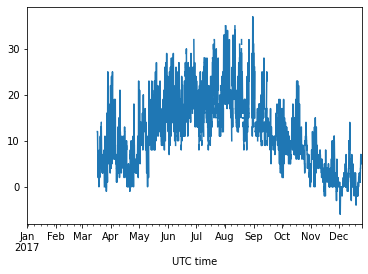

In [26]:
new_df[new_df['id'] == "140"]["temperature"].plot()

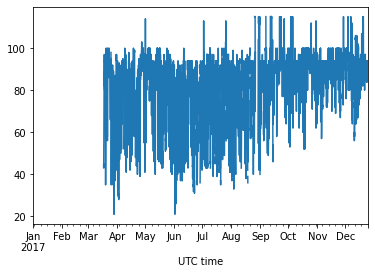

In [27]:
new_df[new_df['id'] == "140"]["humidity"].plot()

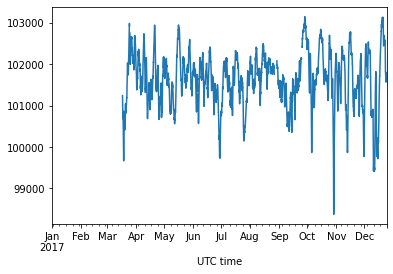

In [28]:
new_df[new_df['id'] == "140"]["pressure"].plot()

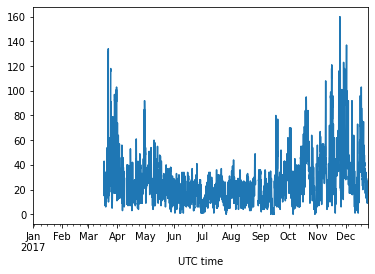

In [29]:
new_df[new_df['id'] == "140"]["pm1"].plot()

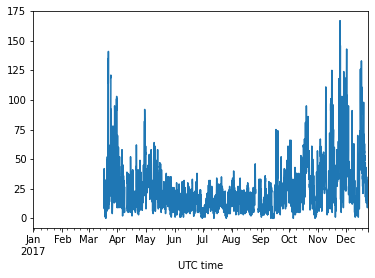

In [30]:
new_df[new_df['id'] == "140"]["pm25"].plot()

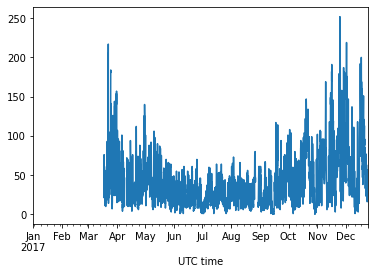

In [31]:
new_df[new_df['id'] == "140"]["pm10"].plot()

In [32]:
new_df.loc['2017-05-17 19:00:00'][:3]

,temperature,humidity,pressure,pm1,pm25,pm10,id
UTC time,,,,,,,
2017-05-17 19:00:00,15.0,58.0,102370.0,16.0,13.0,23.0,140
2017-05-17 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,142
2017-05-17 19:00:00,NaN,NaN,102292.0,14.0,11.0,18.0,147


In [33]:
new_df["id"] = new_df["id"].astype(int)
sensors["id"] = sensors["id"].astype(int)

In [34]:
new_df = new_df.reset_index()
new_df.head()

,UTC time,temperature,humidity,pressure,pm1,pm25,pm10,id
0,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140
1,2017-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140
2,2017-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140
3,2017-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140
4,2017-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140


In [35]:
geo_df = new_df.merge(sensors, how='left', on='id')
geo_df

,UTC time,temperature,humidity,pressure,pm1,pm25,pm10,id,latitude,longitude
0,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140,50.057747,19.961374
1,2017-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140,50.057747,19.961374
2,2017-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140,50.057747,19.961374
3,2017-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140,50.057747,19.961374
4,2017-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,140,50.057747,19.961374
...,...,...,...,...,...,...,...,...,...,...
481203,2017-12-24 20:00:00,5.0,85.0,101798.0,13.0,15.0,26.0,895,50.084966,19.877998
481204,2017-12-24 21:00:00,5.0,85.0,101840.0,12.0,13.0,23.0,895,50.084966,19.877998
481205,2017-12-24 22:00:00,5.0,82.0,101839.0,10.0,12.0,21.0,895,50.084966,19.877998
481206,2017-12-24 23:00:00,5.0,85.0,101837.0,10.0,12.0,21.0,895,50.084966,19.877998


In [50]:
geo_df[:3]

,UTC time,temperature,humidity,pressure,pm1,pm25,pm10,id,latitude,longitude
0,2017-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,140,50.057747,19.961374
1,2017-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,140,50.057747,19.961374
2,2017-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,140,50.057747,19.961374


In [62]:
geo_df["Y"] = geo_df["UTC time"].dt.year
geo_df["Date"] = geo_df["UTC time"].dt.date
geo_df["Time"] = geo_df["UTC time"].dt.time
geo_df["D_name"] = geo_df["UTC time"].dt.day_name()
geo_df["M_name"] = geo_df["UTC time"].dt.month_name()
geo_df["Quorter"] = geo_df["UTC time"].dt.quarter
geo_df["M"] = geo_df["UTC time"].dt.month
geo_df["D"] = geo_df["UTC time"].dt.day
geo_df["H"] = geo_df["UTC time"].dt.hour
geo_df["Week"] = geo_df["UTC time"].dt.week
geo_df["day of  Week"] = geo_df["UTC time"].dt.dayofweek
geo_df["Weekend"] = geo_df["UTC time"].dt.dayofweek.apply(lambda x: "1" if x in [5,6] else "0"   )
geo_df["day of  Year"] = geo_df["UTC time"].dt.dayofyear
geo_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  # This is added back by InteractiveShellApp.init_path()


,UTC time,temperature,humidity,pressure,pm1,pm25,pm10,id,latitude,longitude,Y,Date,Time,D_name,M_name,Quorter,M,D,H,Week,day of Week,Weekend,day of Year,dni w miesiacu
0,2017-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,140,50.057747,19.961374,2017,2017-01-01,00:00:00,Sunday,January,1,1,1,0,52,6,Yes,1,31
1,2017-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,140,50.057747,19.961374,2017,2017-01-01,01:00:00,Sunday,January,1,1,1,1,52,6,Yes,1,31
2,2017-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,140,50.057747,19.961374,2017,2017-01-01,02:00:00,Sunday,January,1,1,1,2,52,6,Yes,1,31
3,2017-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,140,50.057747,19.961374,2017,2017-01-01,03:00:00,Sunday,January,1,1,1,3,52,6,Yes,1,31
4,2017-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,140,50.057747,19.961374,2017,2017-01-01,04:00:00,Sunday,January,1,1,1,4,52,6,Yes,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481203,2017-12-24 20:00:00,5.0,85.0,101798.0,13.0,15.0,26.0,895,50.084966,19.877998,2017,2017-12-24,20:00:00,Sunday,December,4,12,24,20,51,6,Yes,358,31
481204,2017-12-24 21:00:00,5.0,85.0,101840.0,12.0,13.0,23.0,895,50.084966,19.877998,2017,2017-12-24,21:00:00,Sunday,December,4,12,24,21,51,6,Yes,358,31
481205,2017-12-24 22:00:00,5.0,82.0,101839.0,10.0,12.0,21.0,895,50.084966,19.877998,2017,2017-12-24,22:00:00,Sunday,December,4,12,24,22,51,6,Yes,358,31
481206,2017-12-24 23:00:00,5.0,85.0,101837.0,10.0,12.0,21.0,895,50.084966,19.877998,2017,2017-12-24,23:00:00,Sunday,December,4,12,24,23,51,6,Yes,358,31


In [36]:
from numpy import nan

In [37]:
geo_df = geo_df.replace({nan:0})

In [38]:
geo_df_filtr = geo_df[geo_df["UTC time"] == "2017-12-24 22:00:00" ]
geo_df_filtr[:3]

,UTC time,temperature,humidity,pressure,pm1,pm25,pm10,id,latitude,longitude
8590,2017-12-24 22:00:00,6.0,85.0,101785.0,11.0,12.0,21.0,140,50.057747,19.961374
17183,2017-12-24 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,142,50.084816,19.878066
25776,2017-12-24 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,147,50.048924,19.962262


In [39]:
geo_df2 = geo_df_filtr[["latitude","longitude","pm10"]].values.tolist()
geo_df2[:3]

[[50.057747, 19.961374, 21.0],
 [50.084816, 19.878066, 0.0],
 [50.048924, 19.962262, 0.0]]

In [40]:
lon, lat = 50.049683,19.944544
zoom_start = 12

m = folium.Map([lon, lat], zoom_start=zoom_start)

# tooltip = 'Check sensor id'
# for id, sensor in sensors.iterrows():
#     color = 'blue'
#     folium.Marker([sensor['latitude'], 
#                    sensor['longitude']], 
#                   popup='sensor_id {:d}'.format(int(sensor['id'])),
#                   icon=folium.Icon(color=color, icon='info-sign'),
#                   tooltip=tooltip).add_to(m)   

HeatMap(geo_df2,
#         min_opacity=1, #1
#         max_zoom=18, #18
#         radius=40,  #25
#         blur=15,  #15 
#         overlay=False, #True
#         control=False, #True
#         show=False, #True
        ).add_to(folium.FeatureGroup(name='Heat Map').add_to(m))
folium.LayerControl().add_to(m)

m

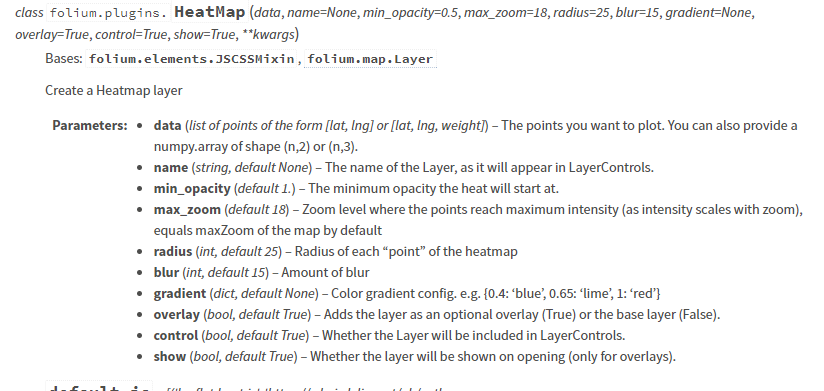

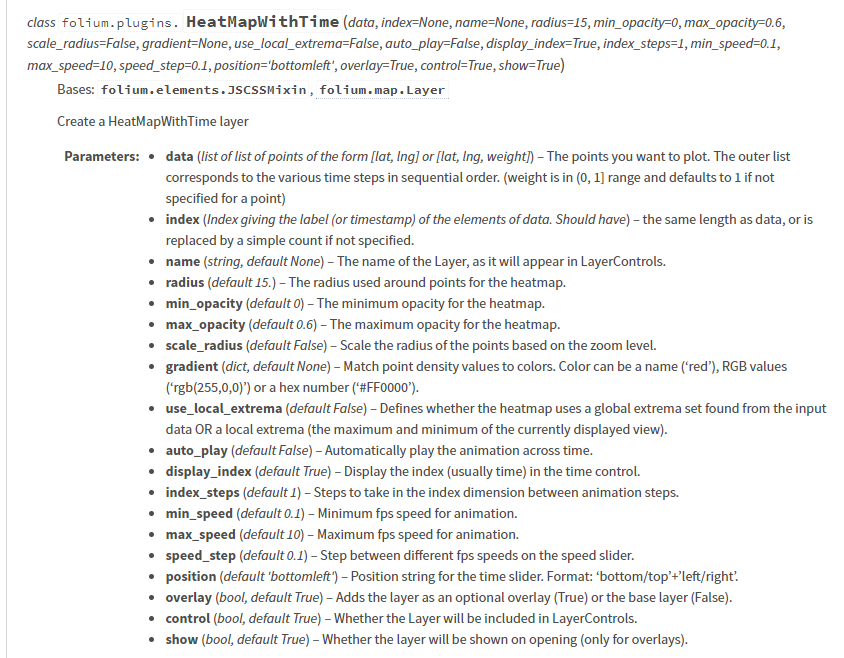

In [41]:
# df["hodzina"] = df["czas"].str.split(" ")[1].split(":")[0]
# df["minuta"] = df["czas"].str.split(" ")[1].split(":")[1]
# df["sekunda "] = df["czas"].str.split(" ")[1].split(":")[2]

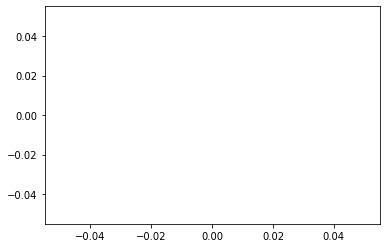

In [44]:
new_df[new_df['id'] == "140"]["pm10"].plot()

In [56]:
import pandas as pd
test = pd.DataFrame.from_dict({
    'row_1': ["Koncert", "2019-03-20 10:30:00"],
    'row_2': ['Teatr', '2019-03-10 08:30:00']
    }, orient='index', columns=["typ","dt"])
test["dt"] = test["dt"].astype("datetime64")
test


,typ,dt
row_1,Koncert,2019-03-20 10:30:00
row_2,Teatr,2019-03-10 08:30:00


In [57]:
#extract 
test["Date"] = test["dt"].dt.date
test["Time"] = test["dt"].dt.time
test["D_name"] = test["dt"].dt.day_name()
test["M_name"] = test["dt"].dt.month_name()
test["Quorter"] = test["dt"].dt.quarter
test["Y"] = test["dt"].dt.year
test["M"] = test["dt"].dt.month
test["D"] = test["dt"].dt.day
test["H"] = test["dt"].dt.hour
test["MIN"] = test["dt"].dt.minute
test["SEC"] = test["dt"].dt.second
test["Week"] = test["dt"].dt.week
test["day of  Week"] = test["dt"].dt.dayofweek
test["Weekend"] = test["dt"].dt.dayofweek.apply(lambda x: "Yes" if x in [5,6] else "No"   )
test["day of  Year"] = test["dt"].dt.dayofyear
test["dni w miesiacu"] = test["dt"].dt.daysinmonth
test["data_string"] = test["dt"].dt.strftime('%B %d, %Y, %r')
 
test.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  del sys.path[0]


,typ,dt,Date,Time,D_name,M_name,Quorter,Y,M,D,H,MIN,SEC,Week,day of Week,Weekend,day of Year,dni w miesiacu,data_string
row_1,Koncert,2019-03-20 10:30:00,2019-03-20,10:30:00,Wednesday,March,1,2019,3,20,10,30,0,12,2,No,79,31,"March 20, 2019, 10:30:00 AM"
row_2,Teatr,2019-03-10 08:30:00,2019-03-10,08:30:00,Sunday,March,1,2019,3,10,8,30,0,10,6,Yes,69,31,"March 10, 2019, 08:30:00 AM"
